In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

%matplotlib inline

In [2]:
fname = '/data/hdd/riops/riops_daily/20160721_2D.nc'
f = nc.Dataset(fname)
jss,jee = 0,1610
iss,iee = 0,1770

temp = f.variables['votemper'][0,jss:jee,iss:iee]
lon = f.variables['longitude'][jss:jee,iss:iee]
lat = f.variables['latitude'][jss:jee,iss:iee]

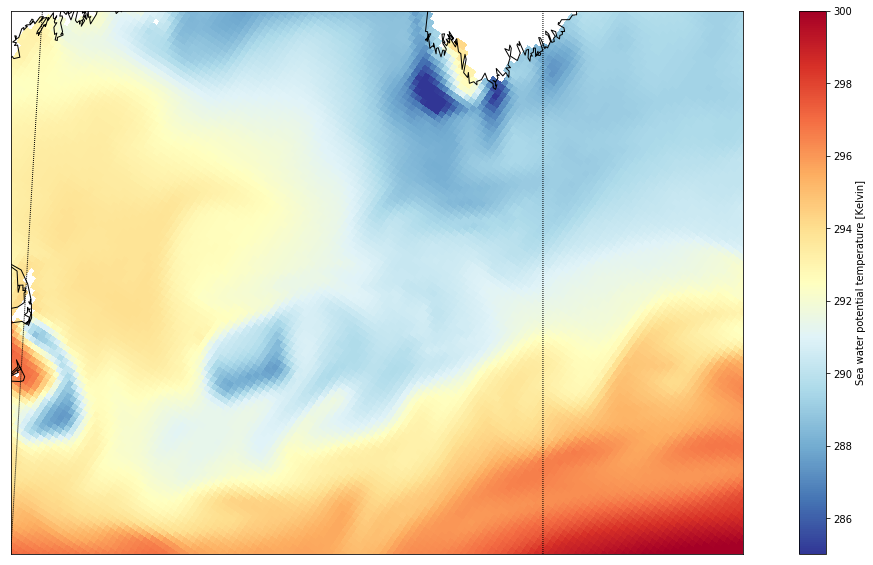

In [6]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
llcrlon,llcrlat,urcrlon,urcrlat=-70,40,-63,44
bmap = Basemap(llcrnrlon=llcrlon,llcrnrlat=llcrlat,urcrnrlon=urcrlon,urcrnrlat=urcrlat,
            resolution='i',projection='cass',lon_0=-65,lat_0=42)
bmap.drawmeridians(np.arange(llcrlon,urcrlon,5.))
bmap.drawparallels(np.arange(llcrlat,urcrlat,5.))
bmap.drawcoastlines()
x,y=bmap(lon, lat)
mesh=ax.pcolormesh(x,y,temp,vmin=285,vmax=300,cmap='RdYlBu_r')
cbar=plt.colorbar(mesh, ax=ax)
cbar.set_label('{} [{}]'.format(f.variables['votemper'].long_name,
                                f.variables['votemper'].units))

In [18]:
f

<type 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.6
    title: Time-averaged sea ice and ocean forecast fields
    institution: The Canadian Centre for Meteorological and Environmental Prediction
    source: Global Ice Ocean Prediction System: version 1.0
    product_version: RIOPS_1.0_F_2
    creation_date: 2016-Jul-21 11:44:08 UTC
    contact: production-info@ec.gc.ca
    history: Mon Oct 31 22:28:50 2016: ncra tmp.nc ../riopsf/2016072100_006_2D_nps.nc ../riopsf/2016072106_003_2D_nps.nc ../riopsf/2016072106_006_2D_nps.nc ../riopsf/2016072112_003_2D_nps.nc ../riopsf/2016072112_006_2D_nps.nc ../riopsf/2016072118_003_2D_nps.nc ../riopsf/2016072118_006_2D_nps.nc 20160721_2D.nc
Mon Oct 31 22:28:37 2016: ncks --mk_rec_dmn time ../riopsf/2016072100_003_2D_nps.nc tmp.nc
    NCO: 4.4.2
    nco_openmp_thread_number: 1
    dimensions(sizes): time(1), yc(1610), xc(1770)
    variables(dimensions): float32 iiceconc(time,yc,xc), float32 iicep